<a href="https://colab.research.google.com/github/amenibelhadj/Notebooks/blob/main/Pare_Chocs_Avant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification des dommages au pare-choc de voiture:

**Léger:**

* **Éraflures superficielles:** Petites rayures superficielles qui n'affectent pas la structure du pare-choc et peuvent être facilement polies.
* **Petits éclats de peinture:** Petits éclats de peinture ne dépassant pas la taille d'une pièce de 1€.
* **Bosses légères:** Petites bosses pouvant être facilement redressées à froid.

**Moyen:**

* **Rayures profondes:** Rayures profondes affectant la peinture et pouvant nécessiter une retouche de peinture.
* **Éclats de peinture importants:** Éclats de peinture importants dépassant la taille d'une pièce de 1€.
* **Bosses plus importantes:** Bosses nécessitant un redressage à chaud ou un remplacement de la section endommagée du pare-choc.

**Important:**

* **Fissures et craquelures:** Fissures et craquelures profondes dans le pare-choc.
* **Manquants de matière:** Manquants de matière importants affectant la structure du pare-choc.
* **Déformation importante:** Déformation importante du pare-choc nécessitant son remplacement complet.

**Exemples:**

**Léger:**

* Une légère rayure causée par un frottement contre un autre véhicule lors du stationnement.
* Un petit éclat de peinture causé par un caillou.
* Une petite bosse causée par un choc contre un trottoir.

**Moyen:**

* Une rayure profonde causée par un accrochage avec un autre véhicule.
* Un éclat de peinture important causé par un choc contre un obstacle.
* Une bosse plus importante nécessitant un redressage à chaud.

**Important:**

* Une fissure profonde dans le pare-choc causée par un choc frontal.
* Un manquant de matière important suite à un accident.
* Un pare-choc complètement déformé suite à un choc violent.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="O7TF3moPfhkdv1OpXzRo")
project = rf.workspace("dataameni").project("pare-chocs-avant")
version = project.version(1)
dataset = version.download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pare-Chocs-Avant-1 in yolov5pytorch:: 100%|██████████| 278/278 [00:00<00:00, 6180.62it/s]


In [2]:
from ultralytics import YOLO
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/Pare-Chocs-Avant-1/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 172MB/s]
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Pare-Chocs-Avant-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [3]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png		train_batch106.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch107.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1710677377.80833e170e97.1685.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch105.jpg	weights


/content


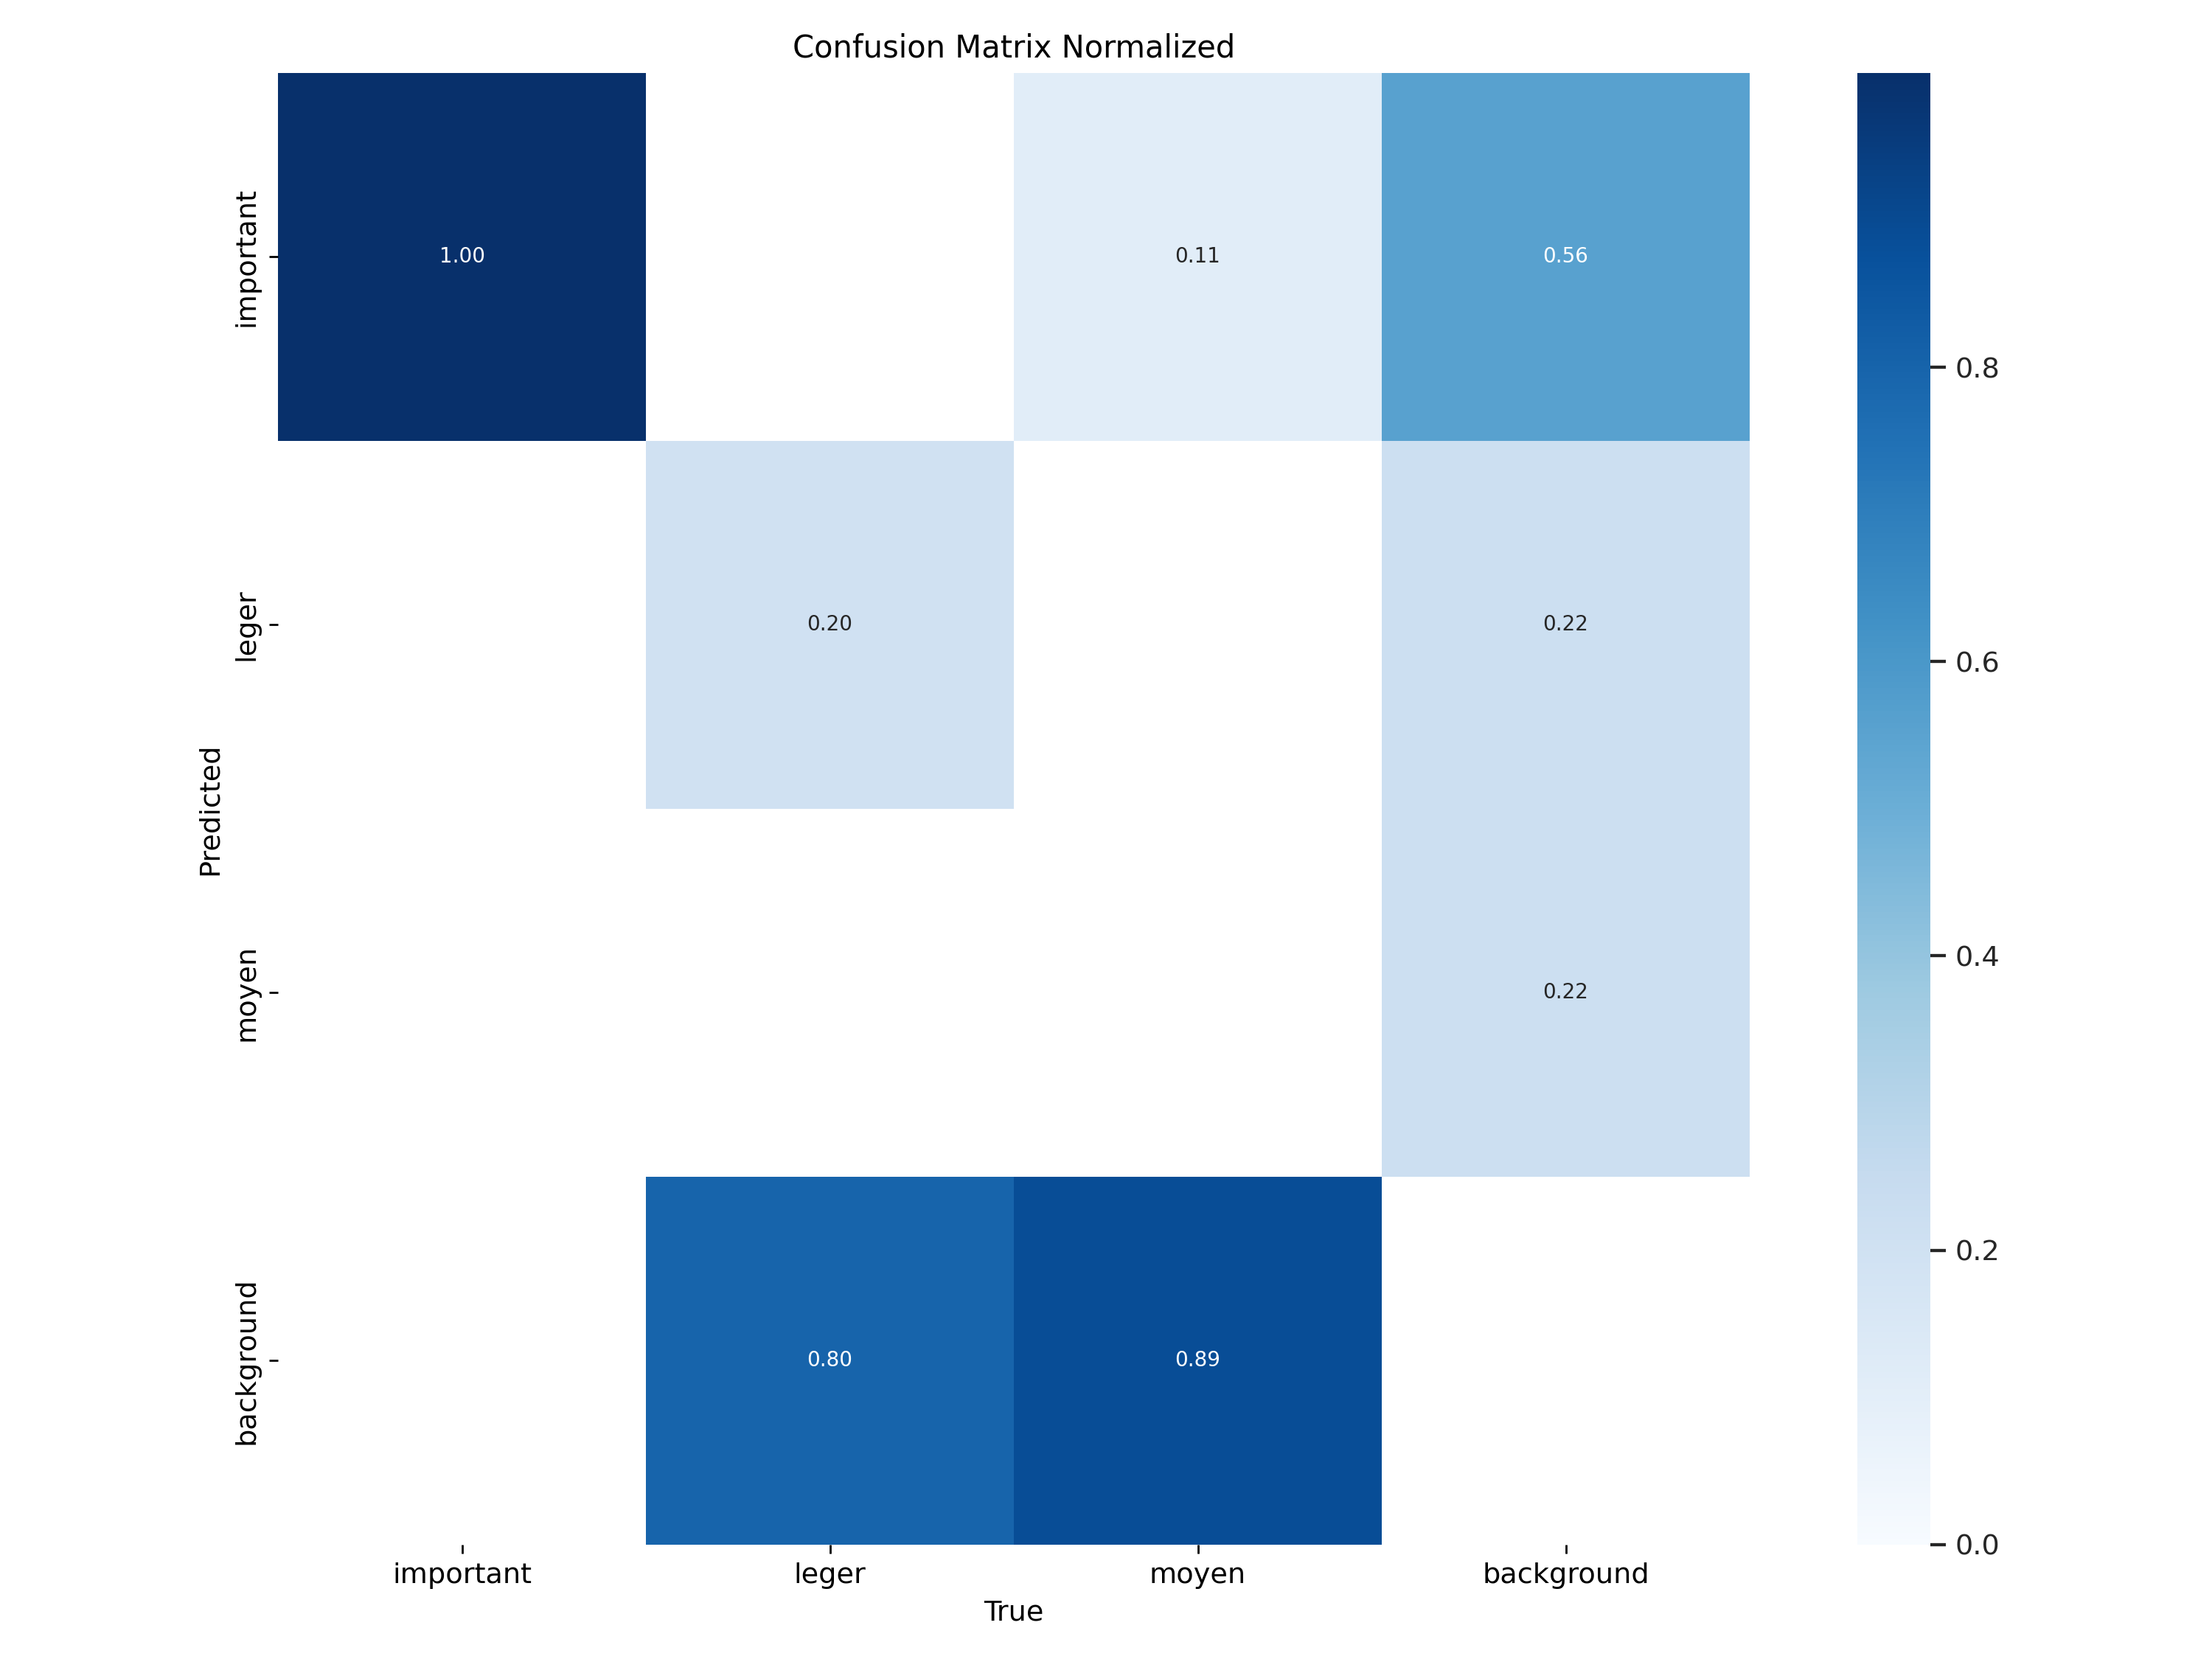

In [4]:
from IPython.display import display, Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=1000)

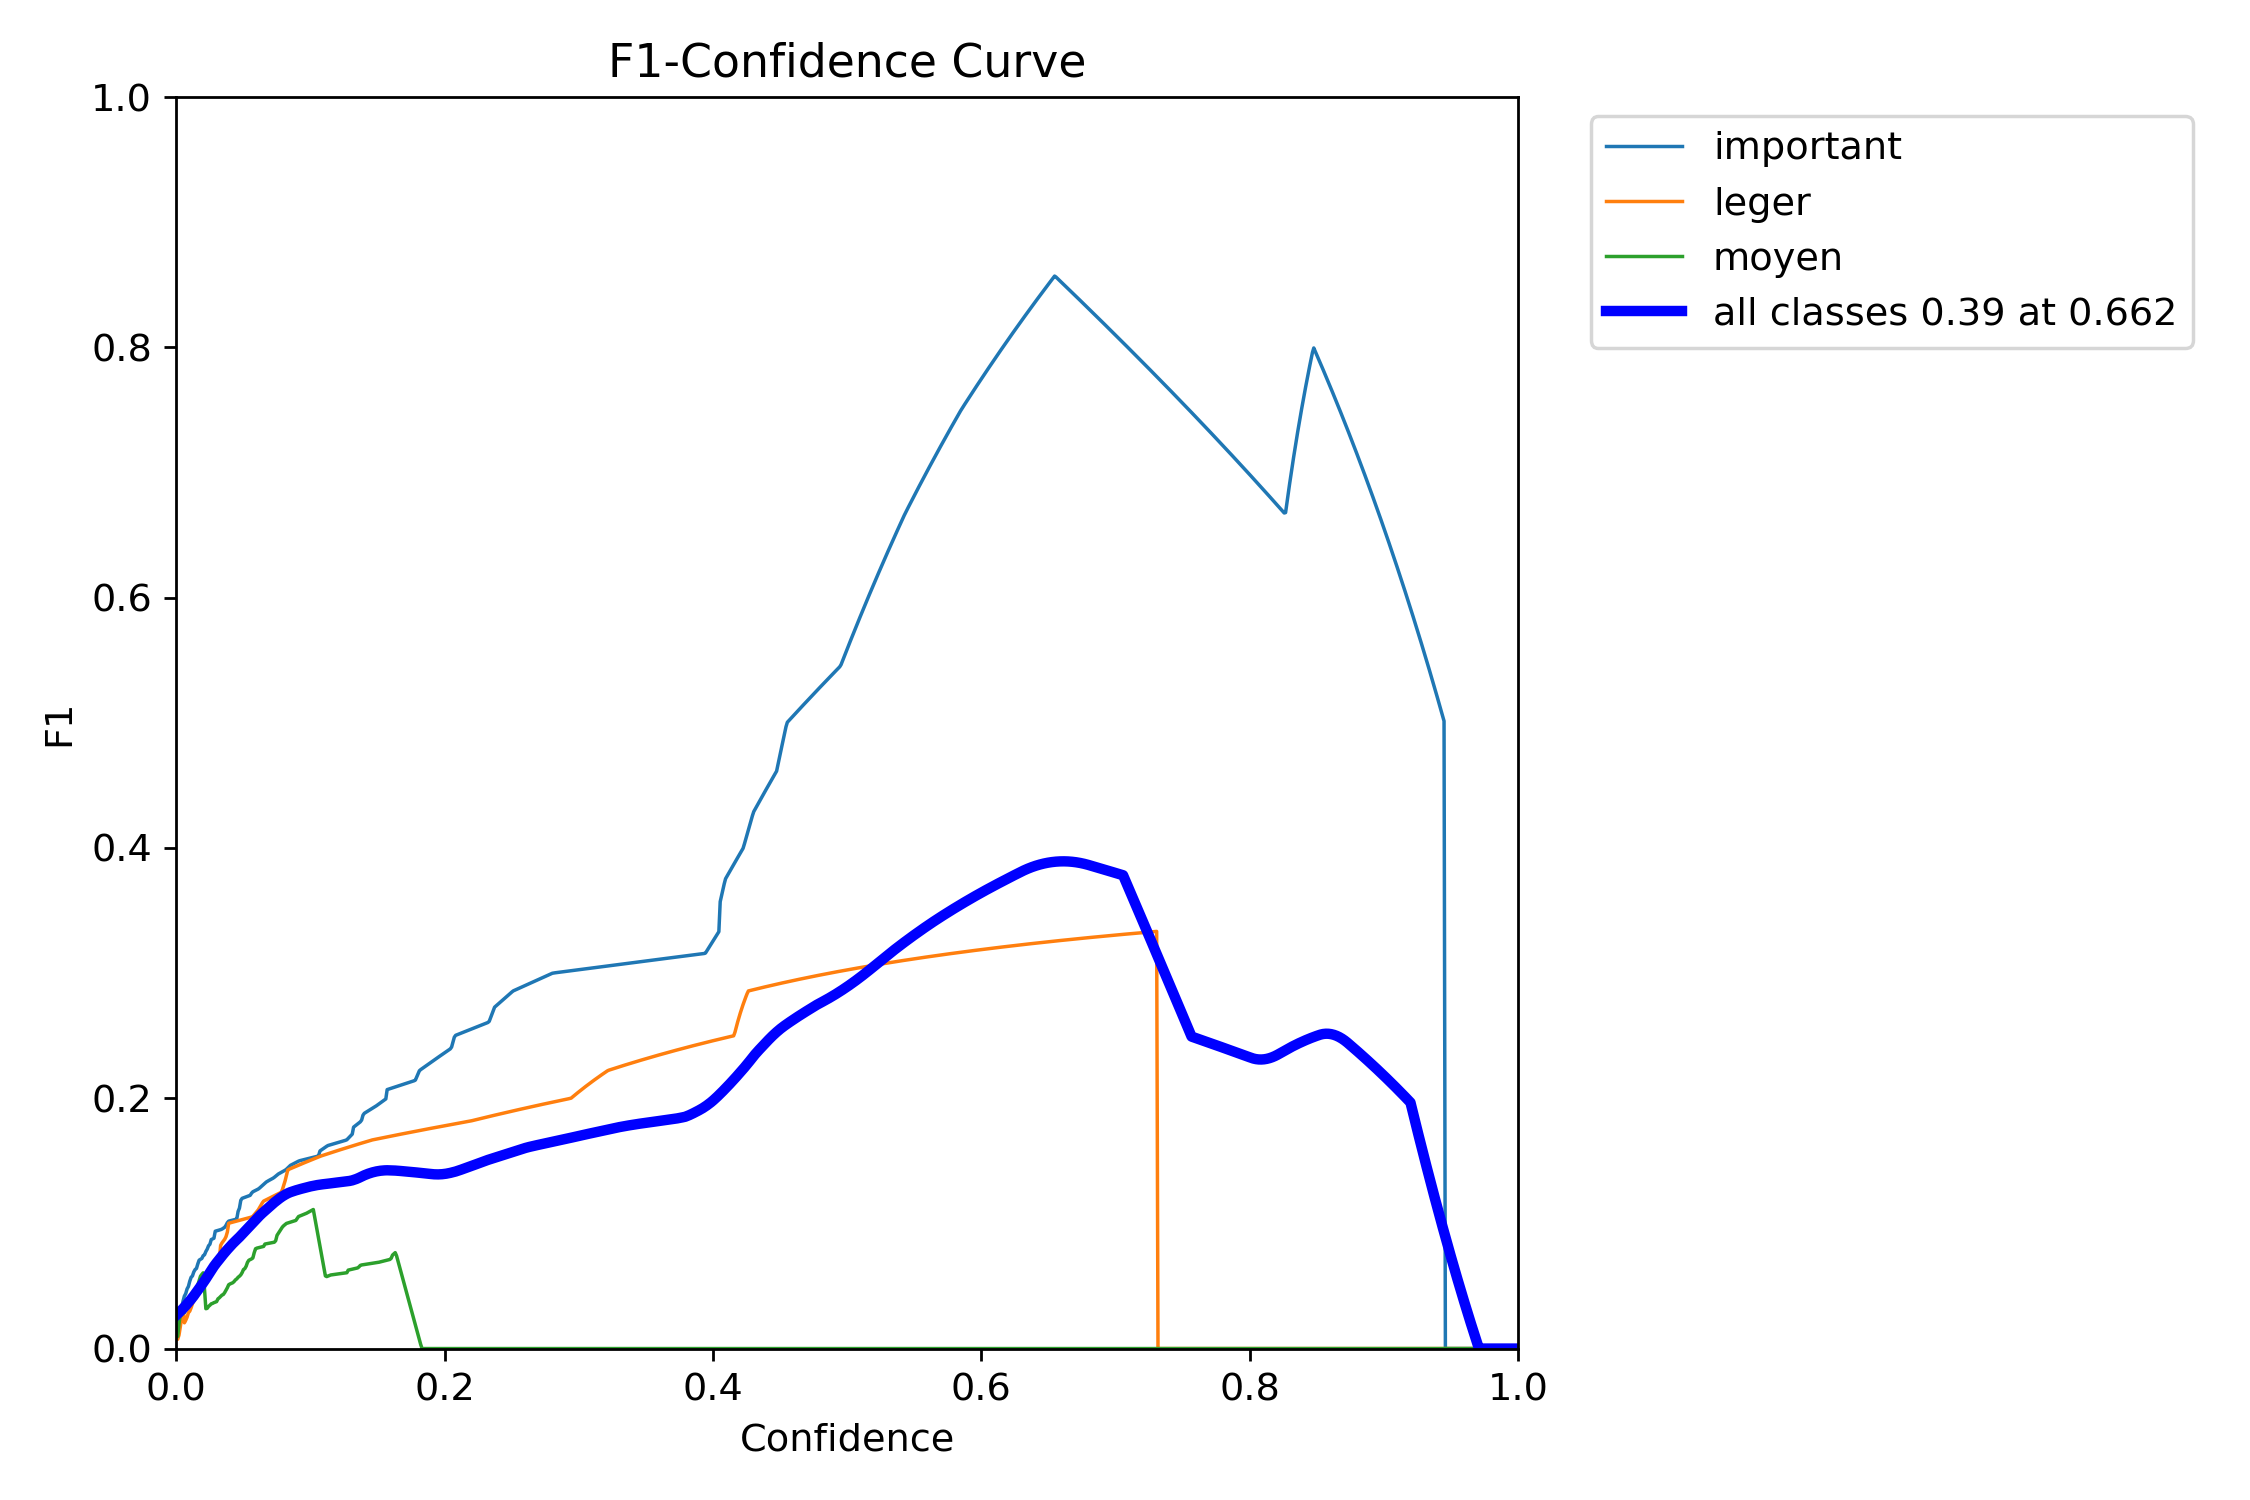

In [5]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=1000)

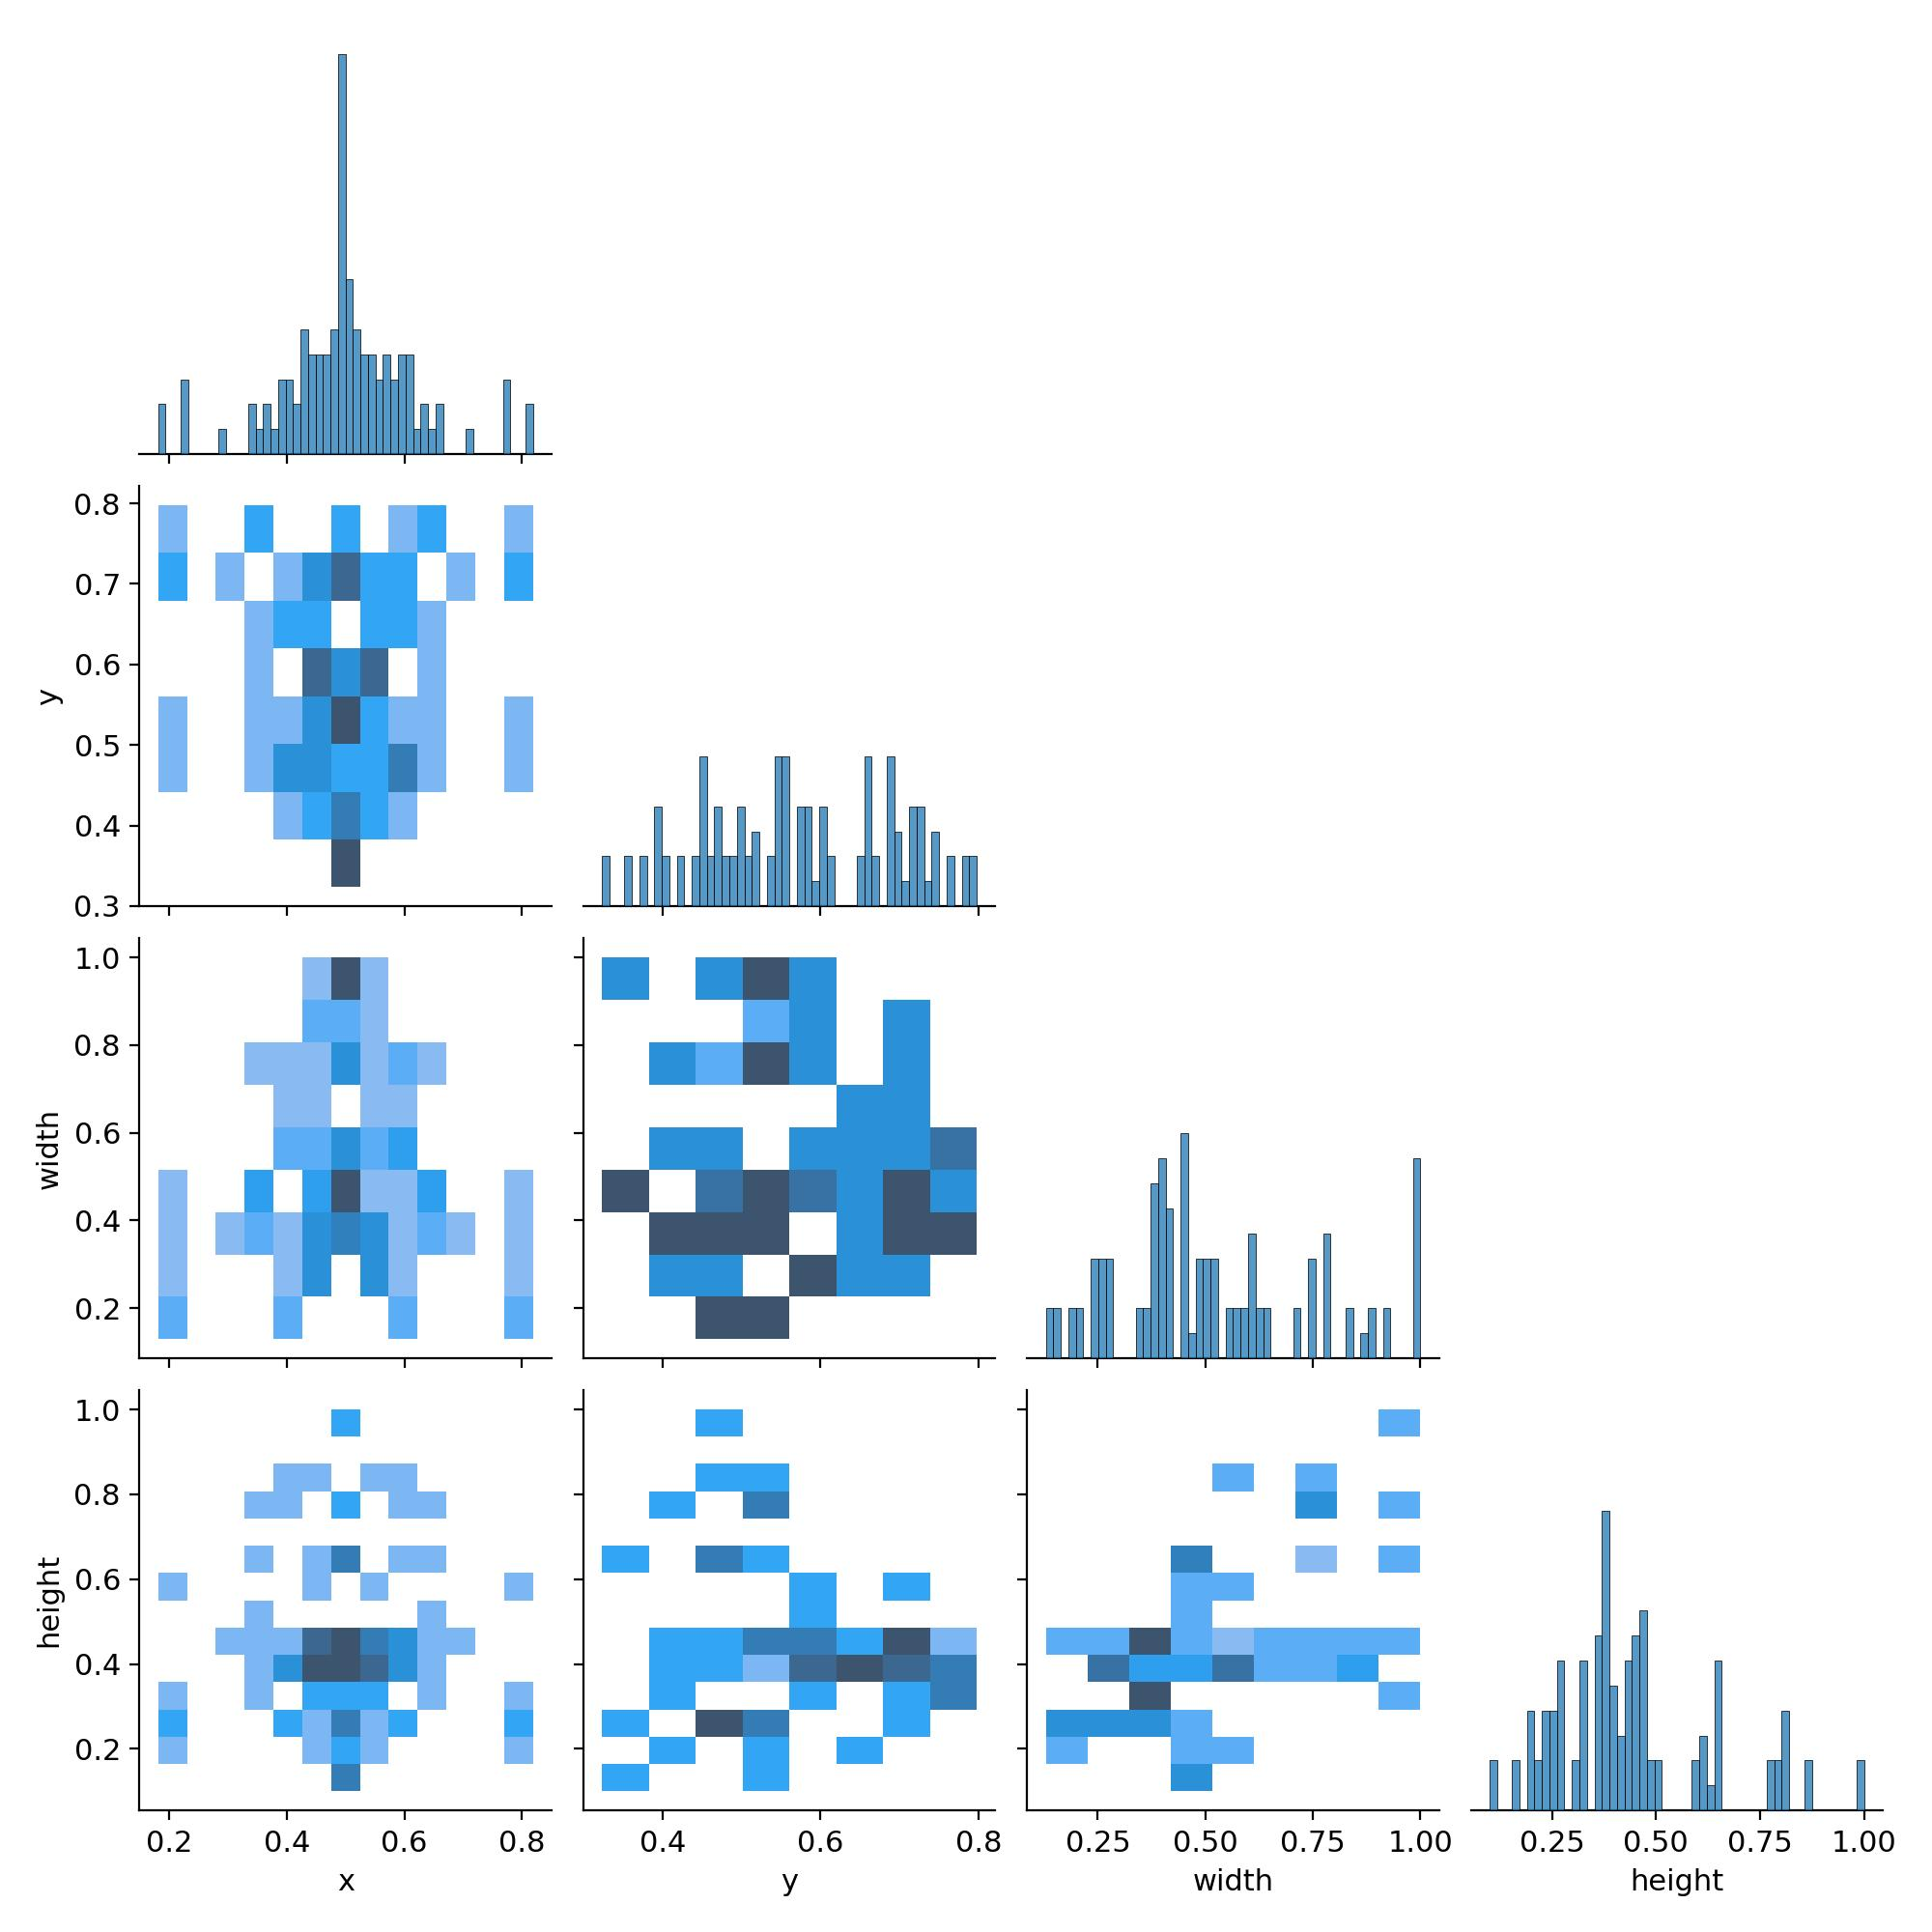

In [6]:
Image(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=1000)

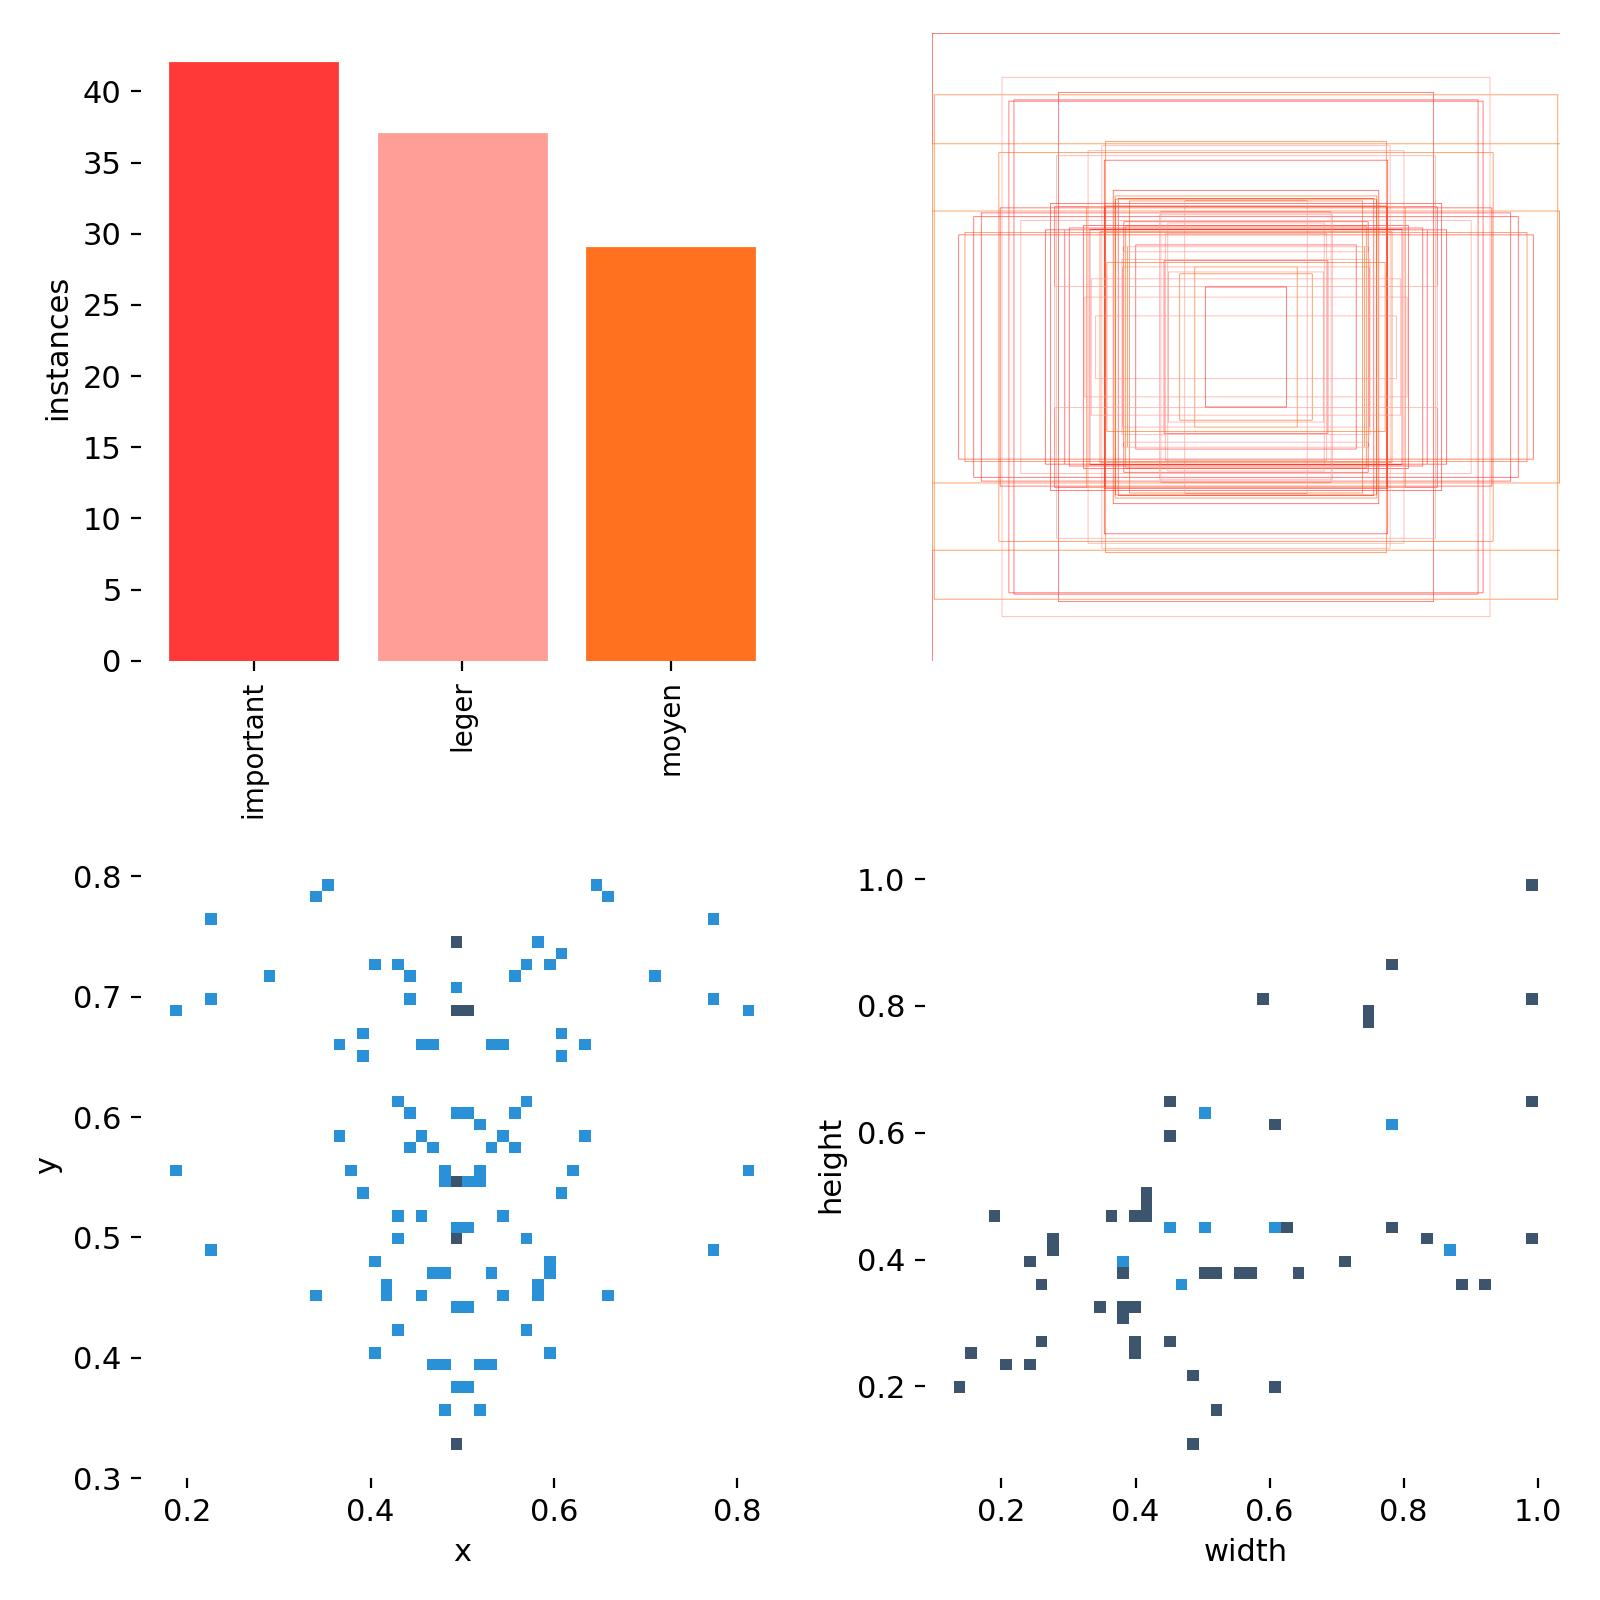

In [7]:
Image(filename=f'{HOME}/runs/detect/train/labels.jpg', width=1000)

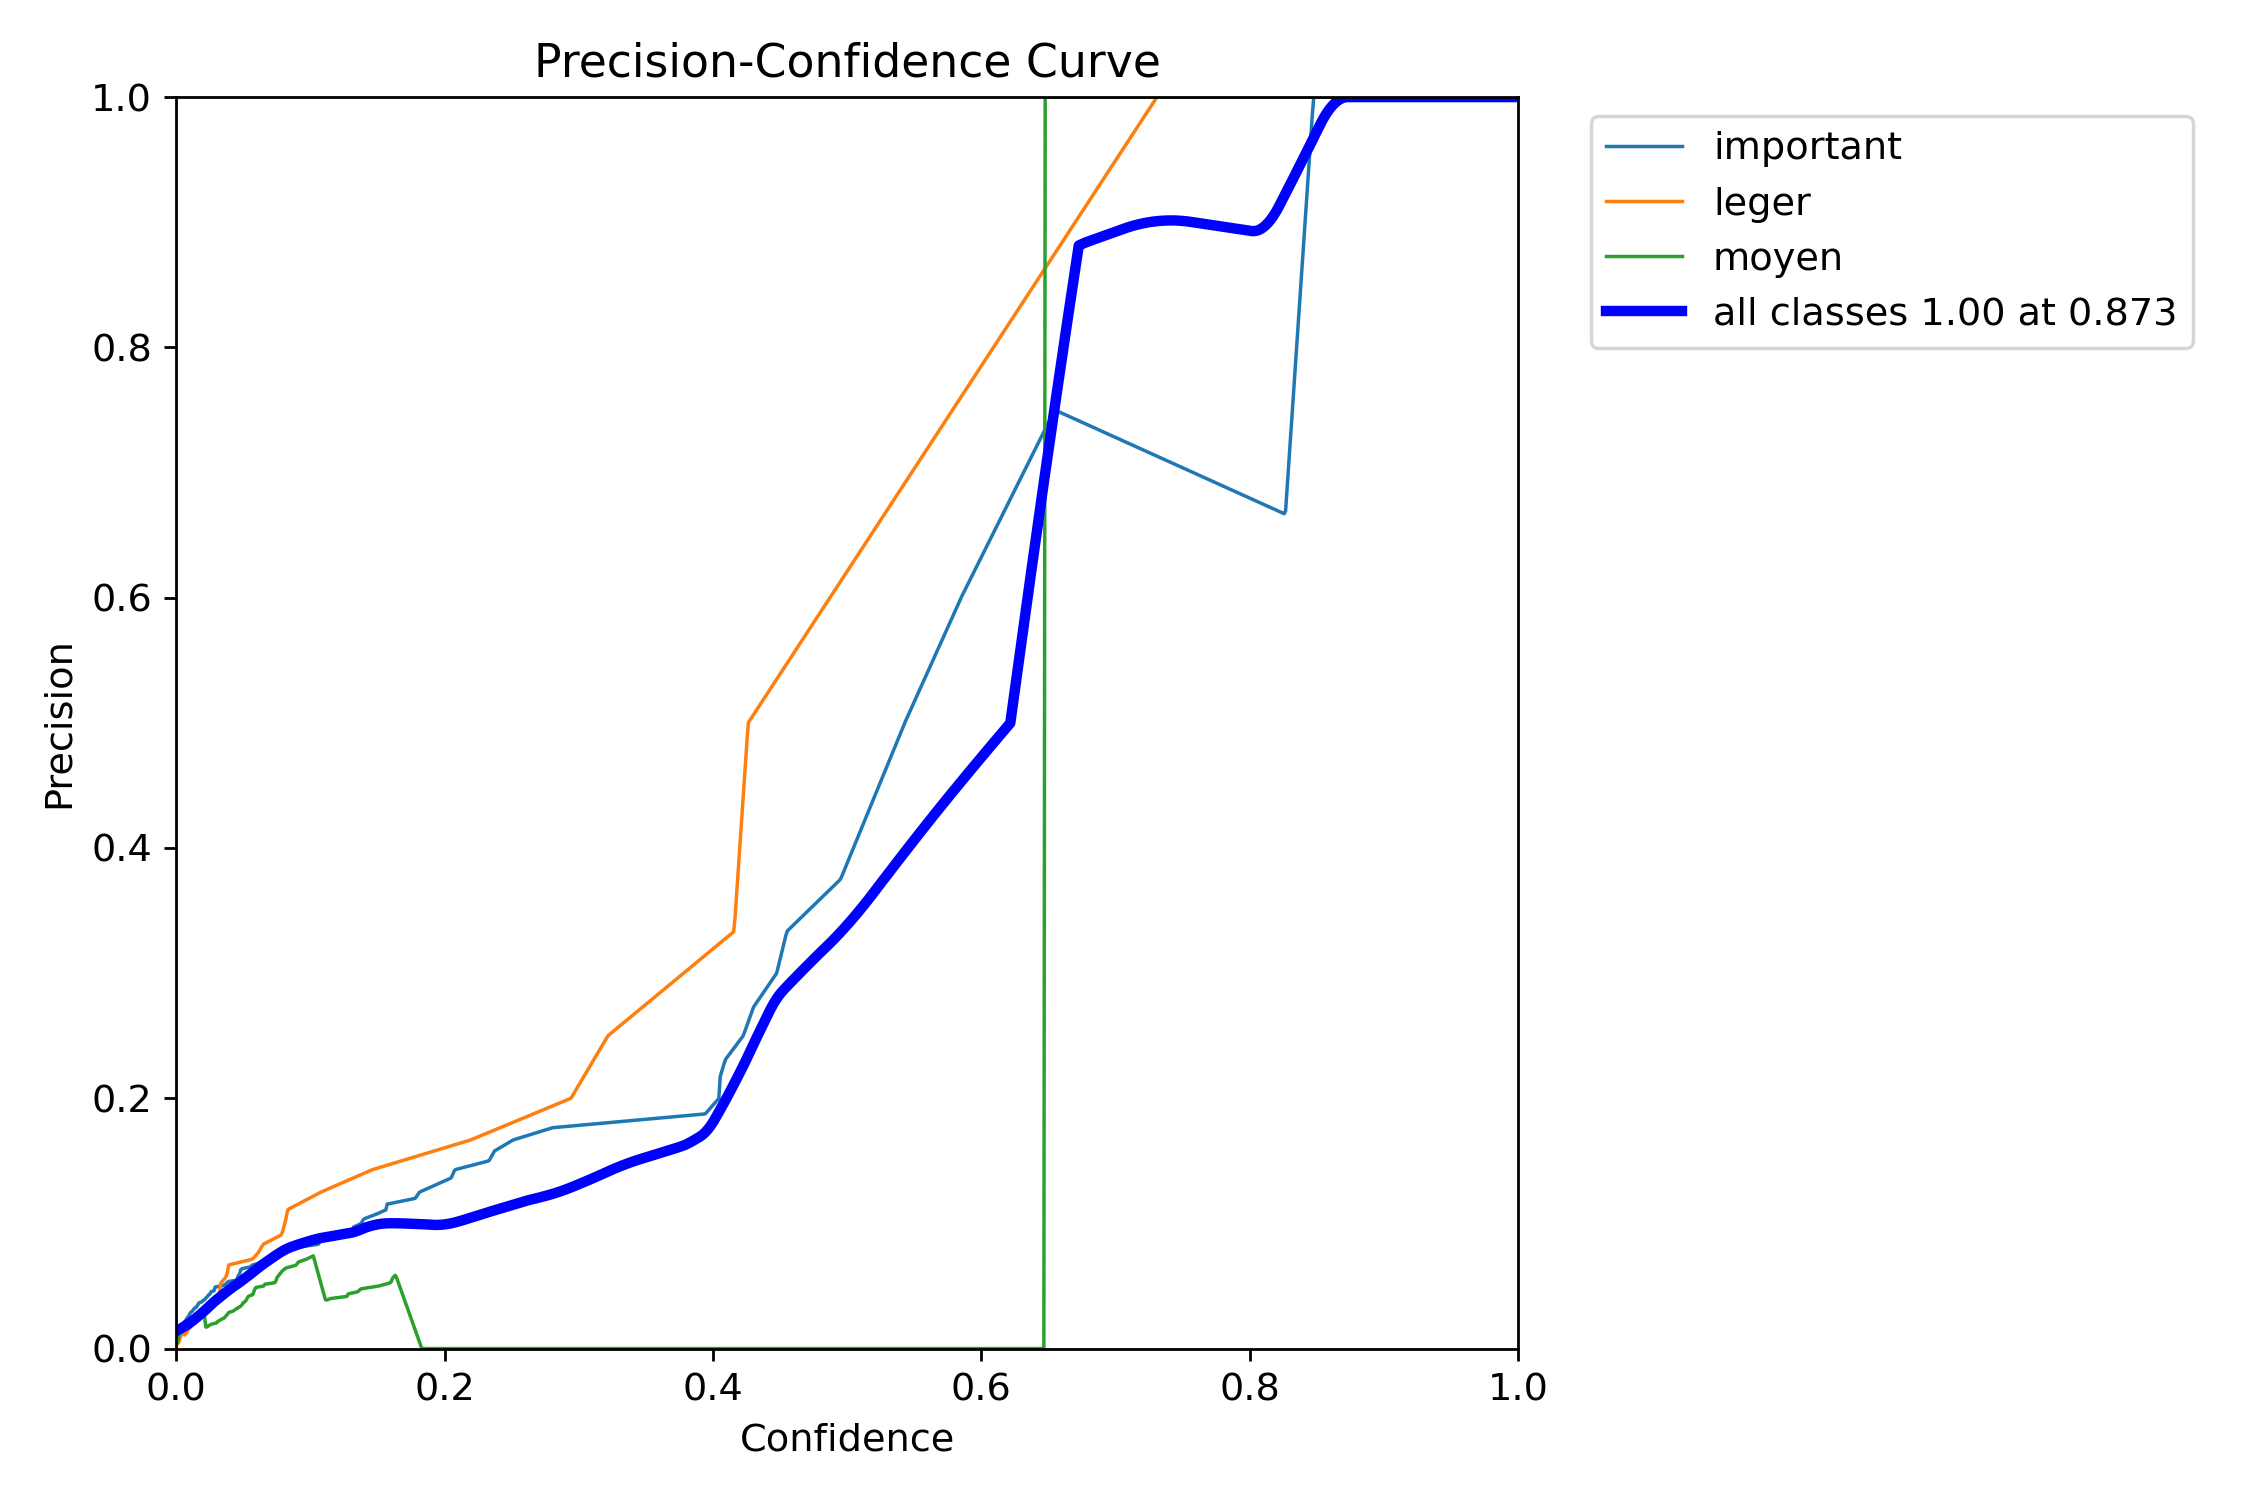

In [8]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=1000)

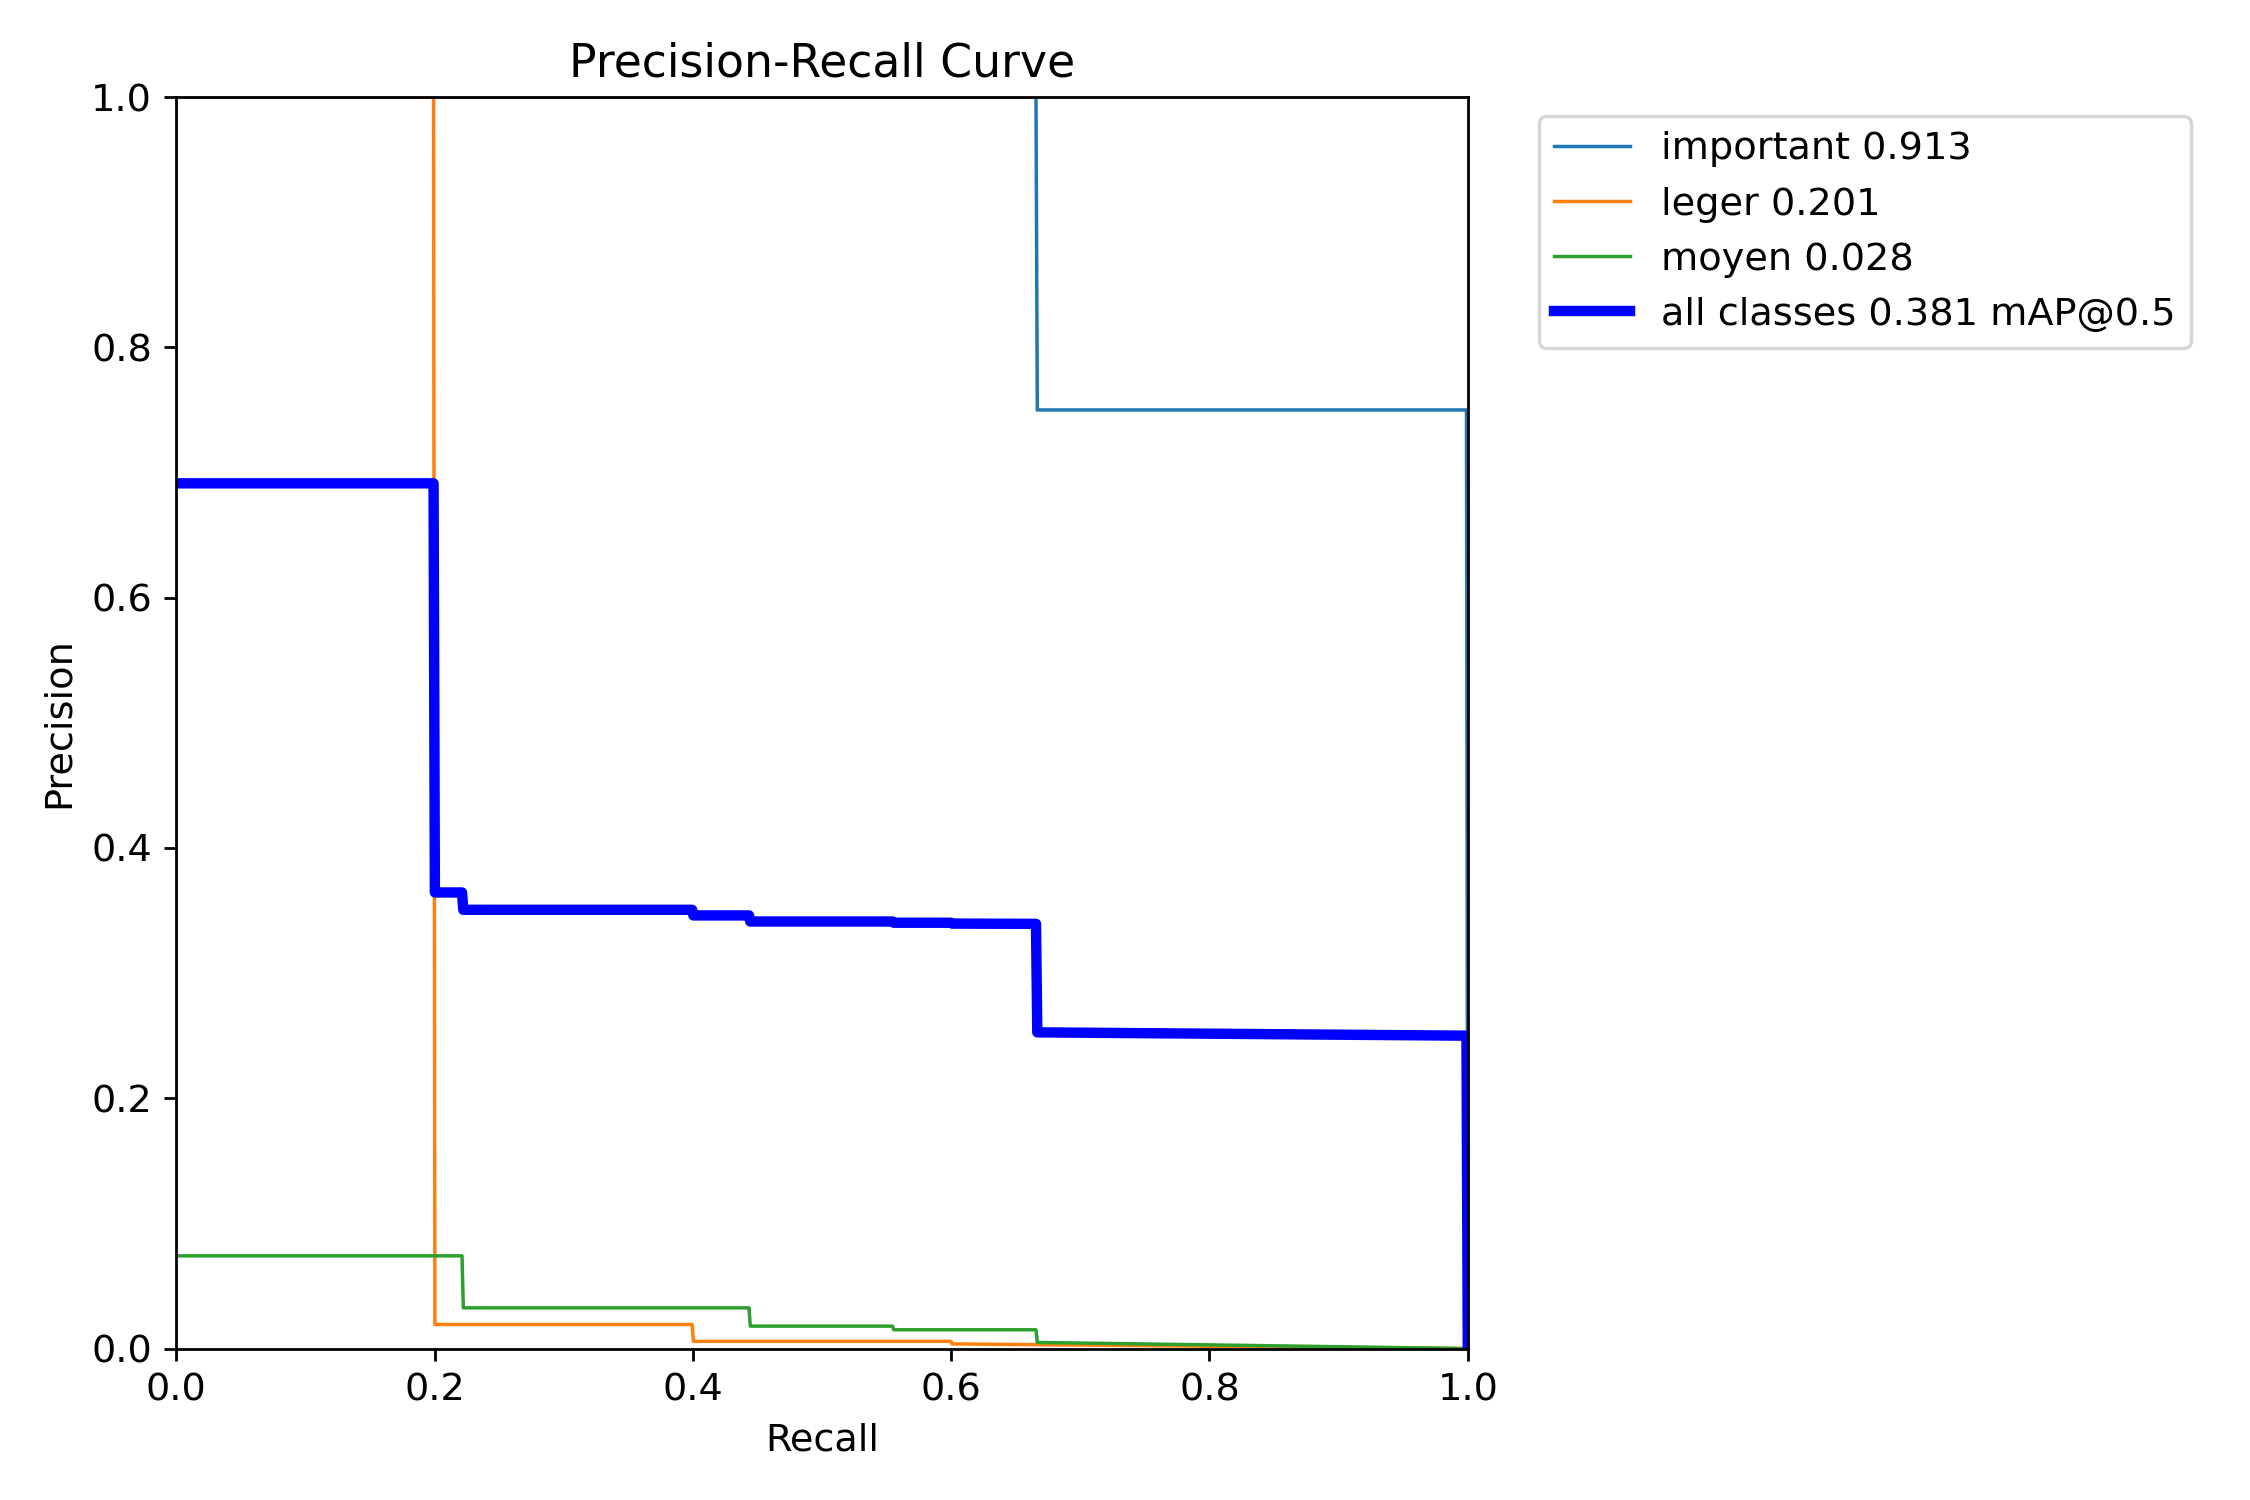

In [9]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=1000)

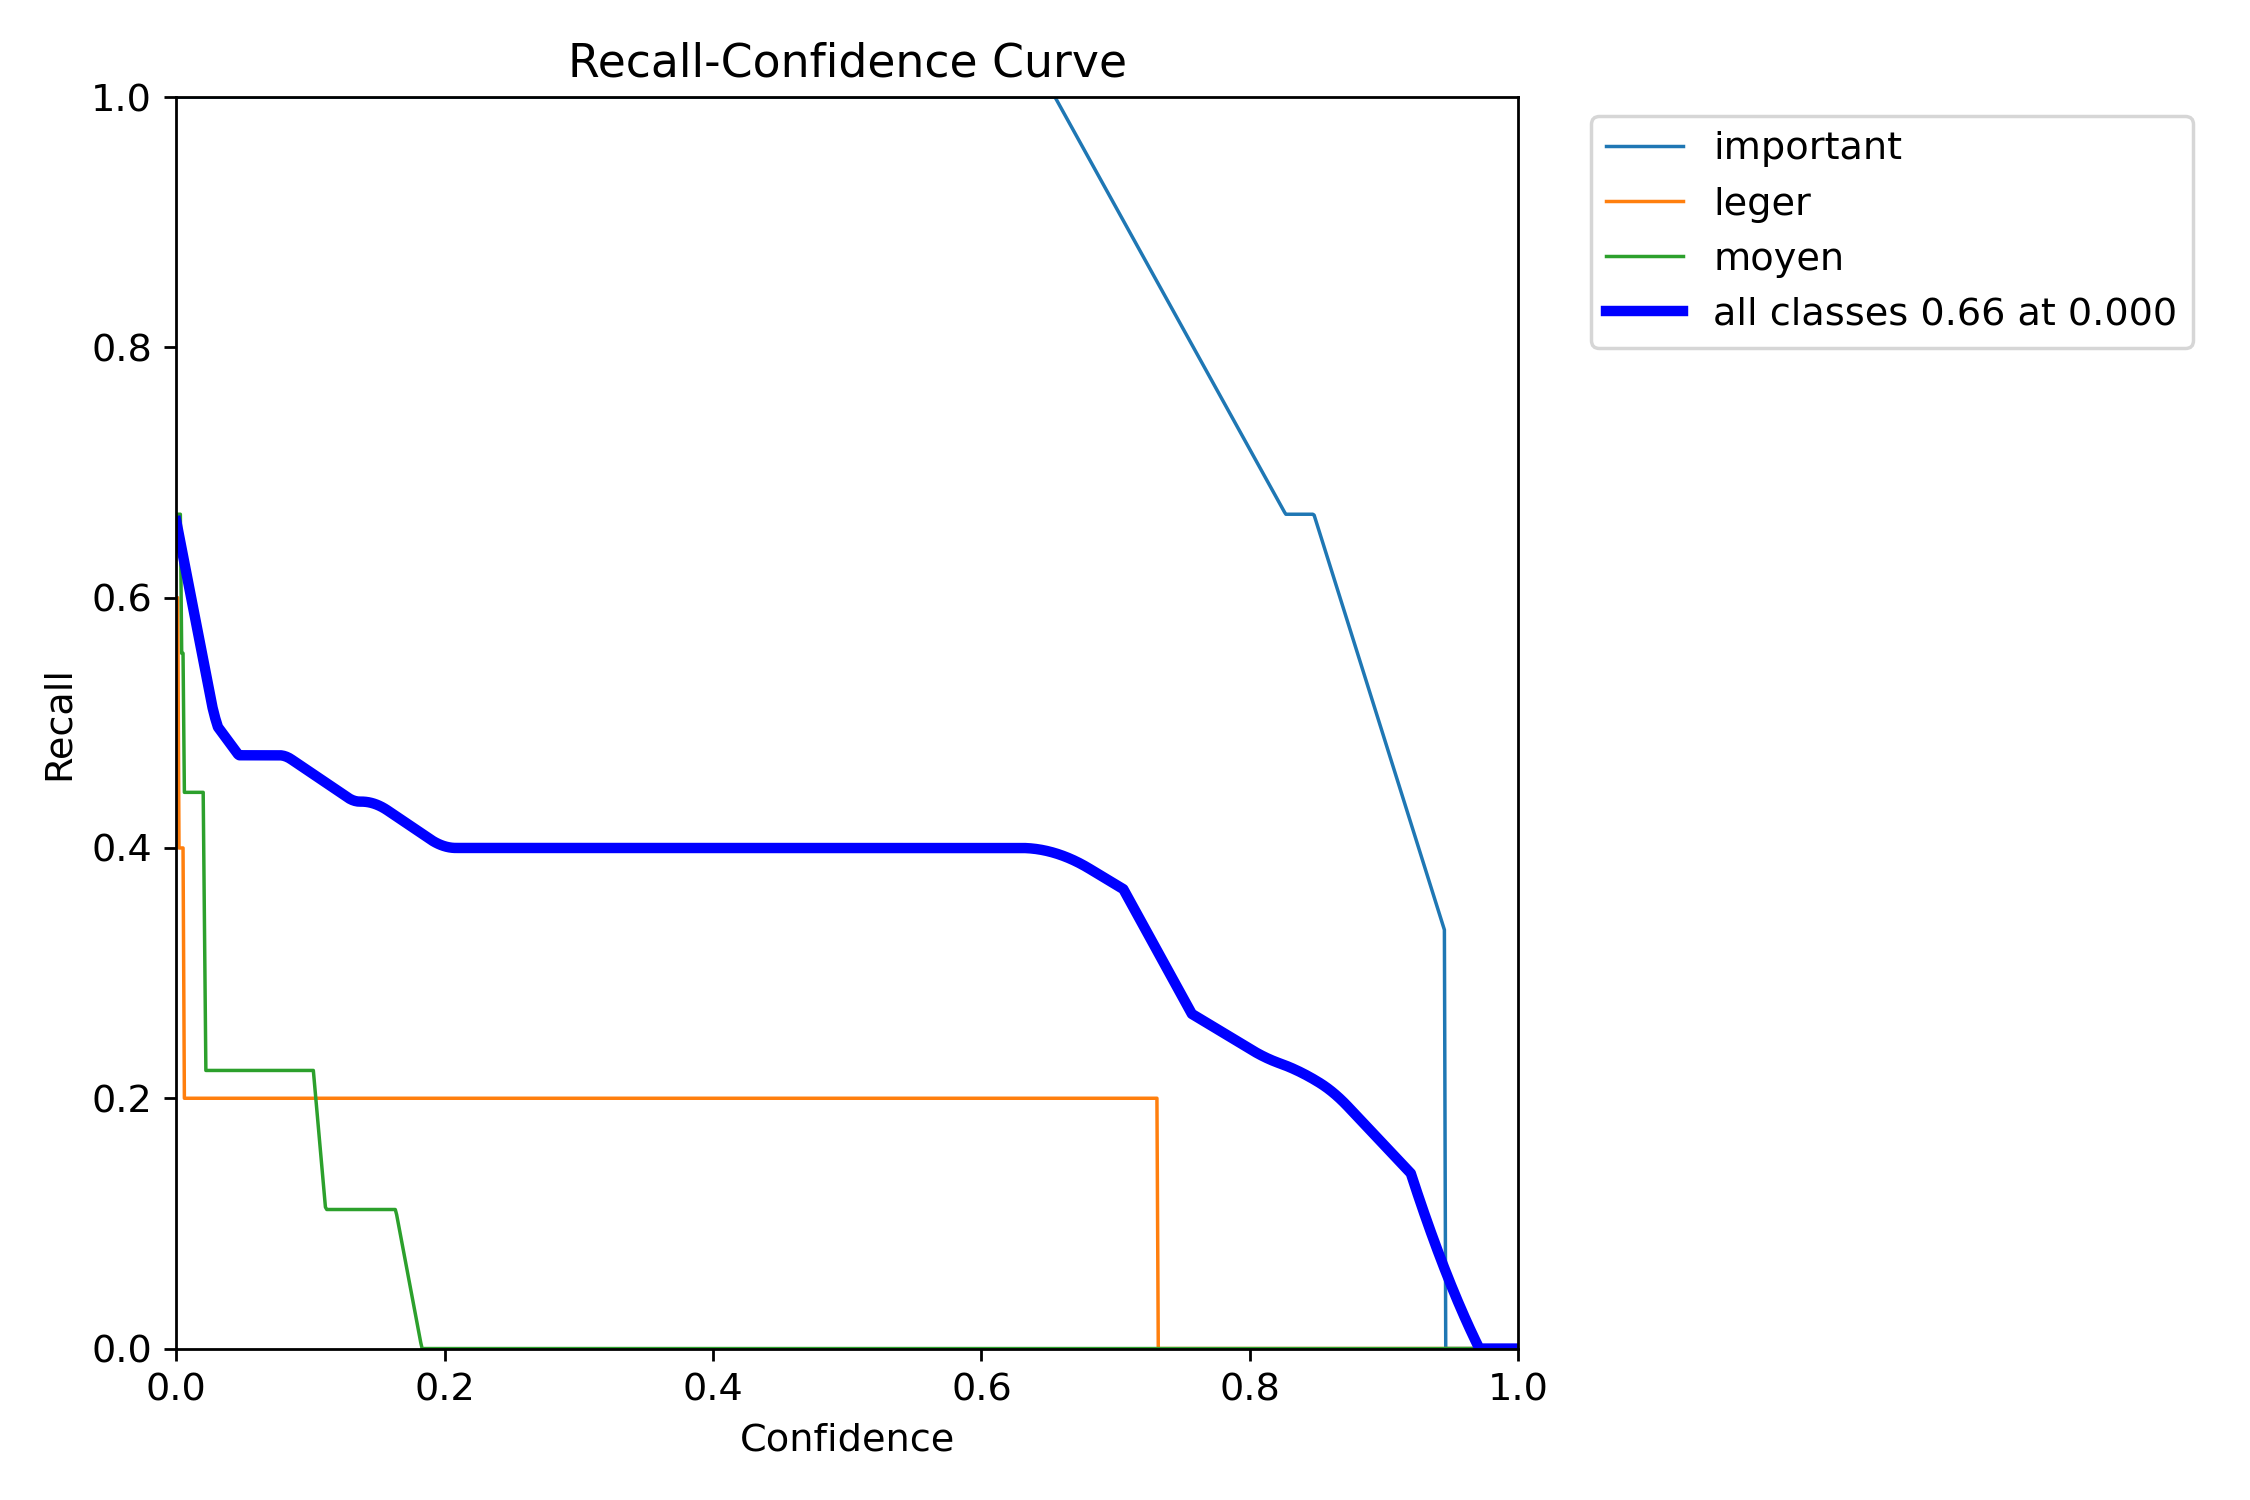

In [10]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=1000)

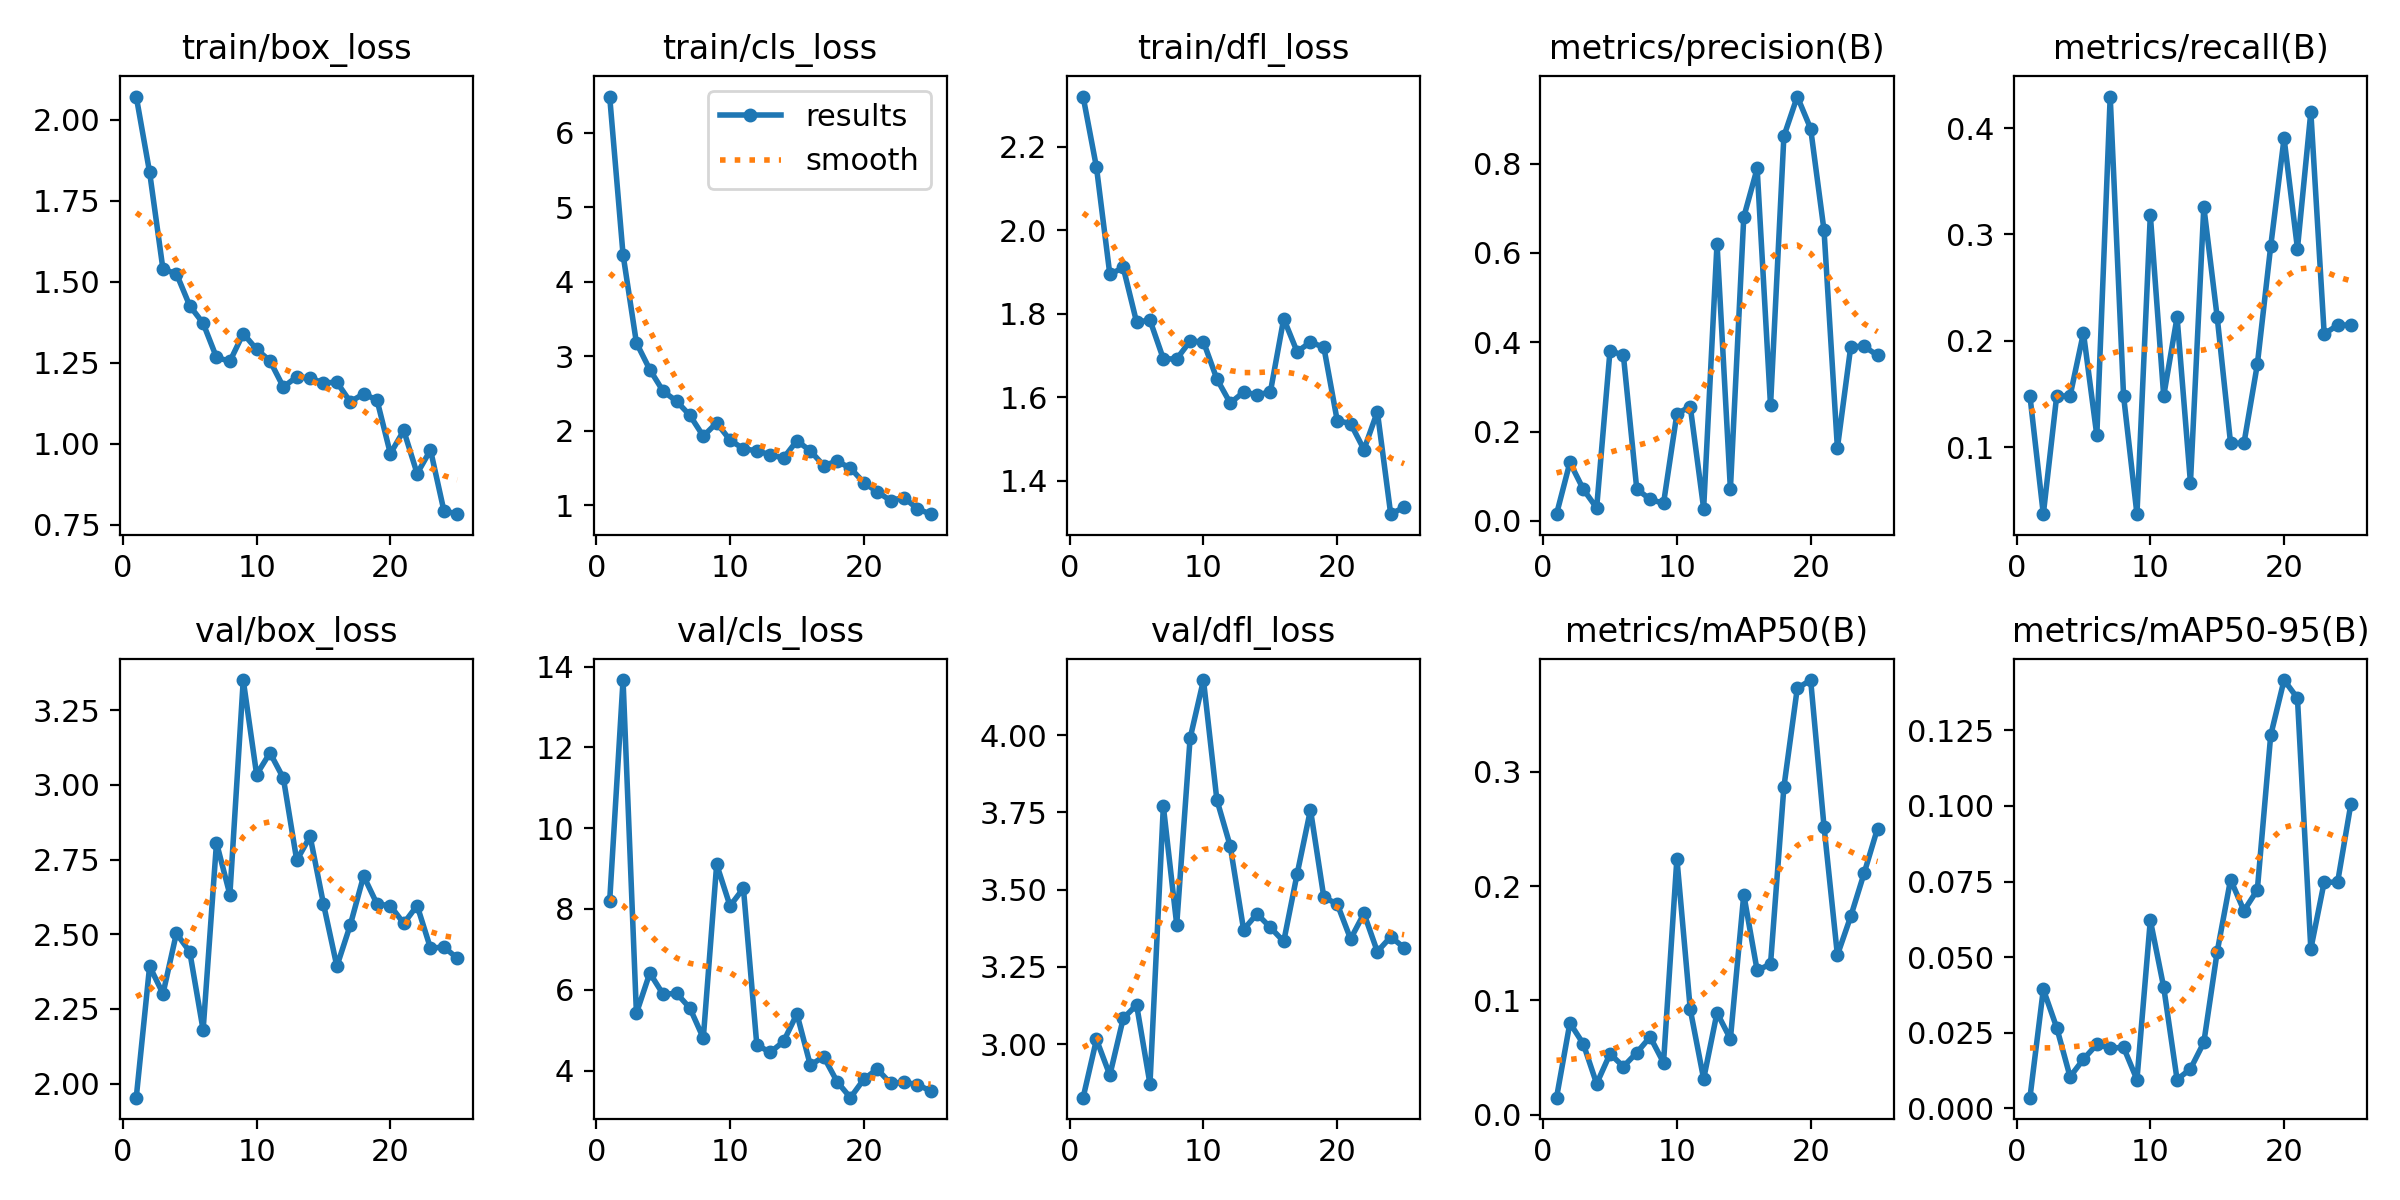

In [11]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

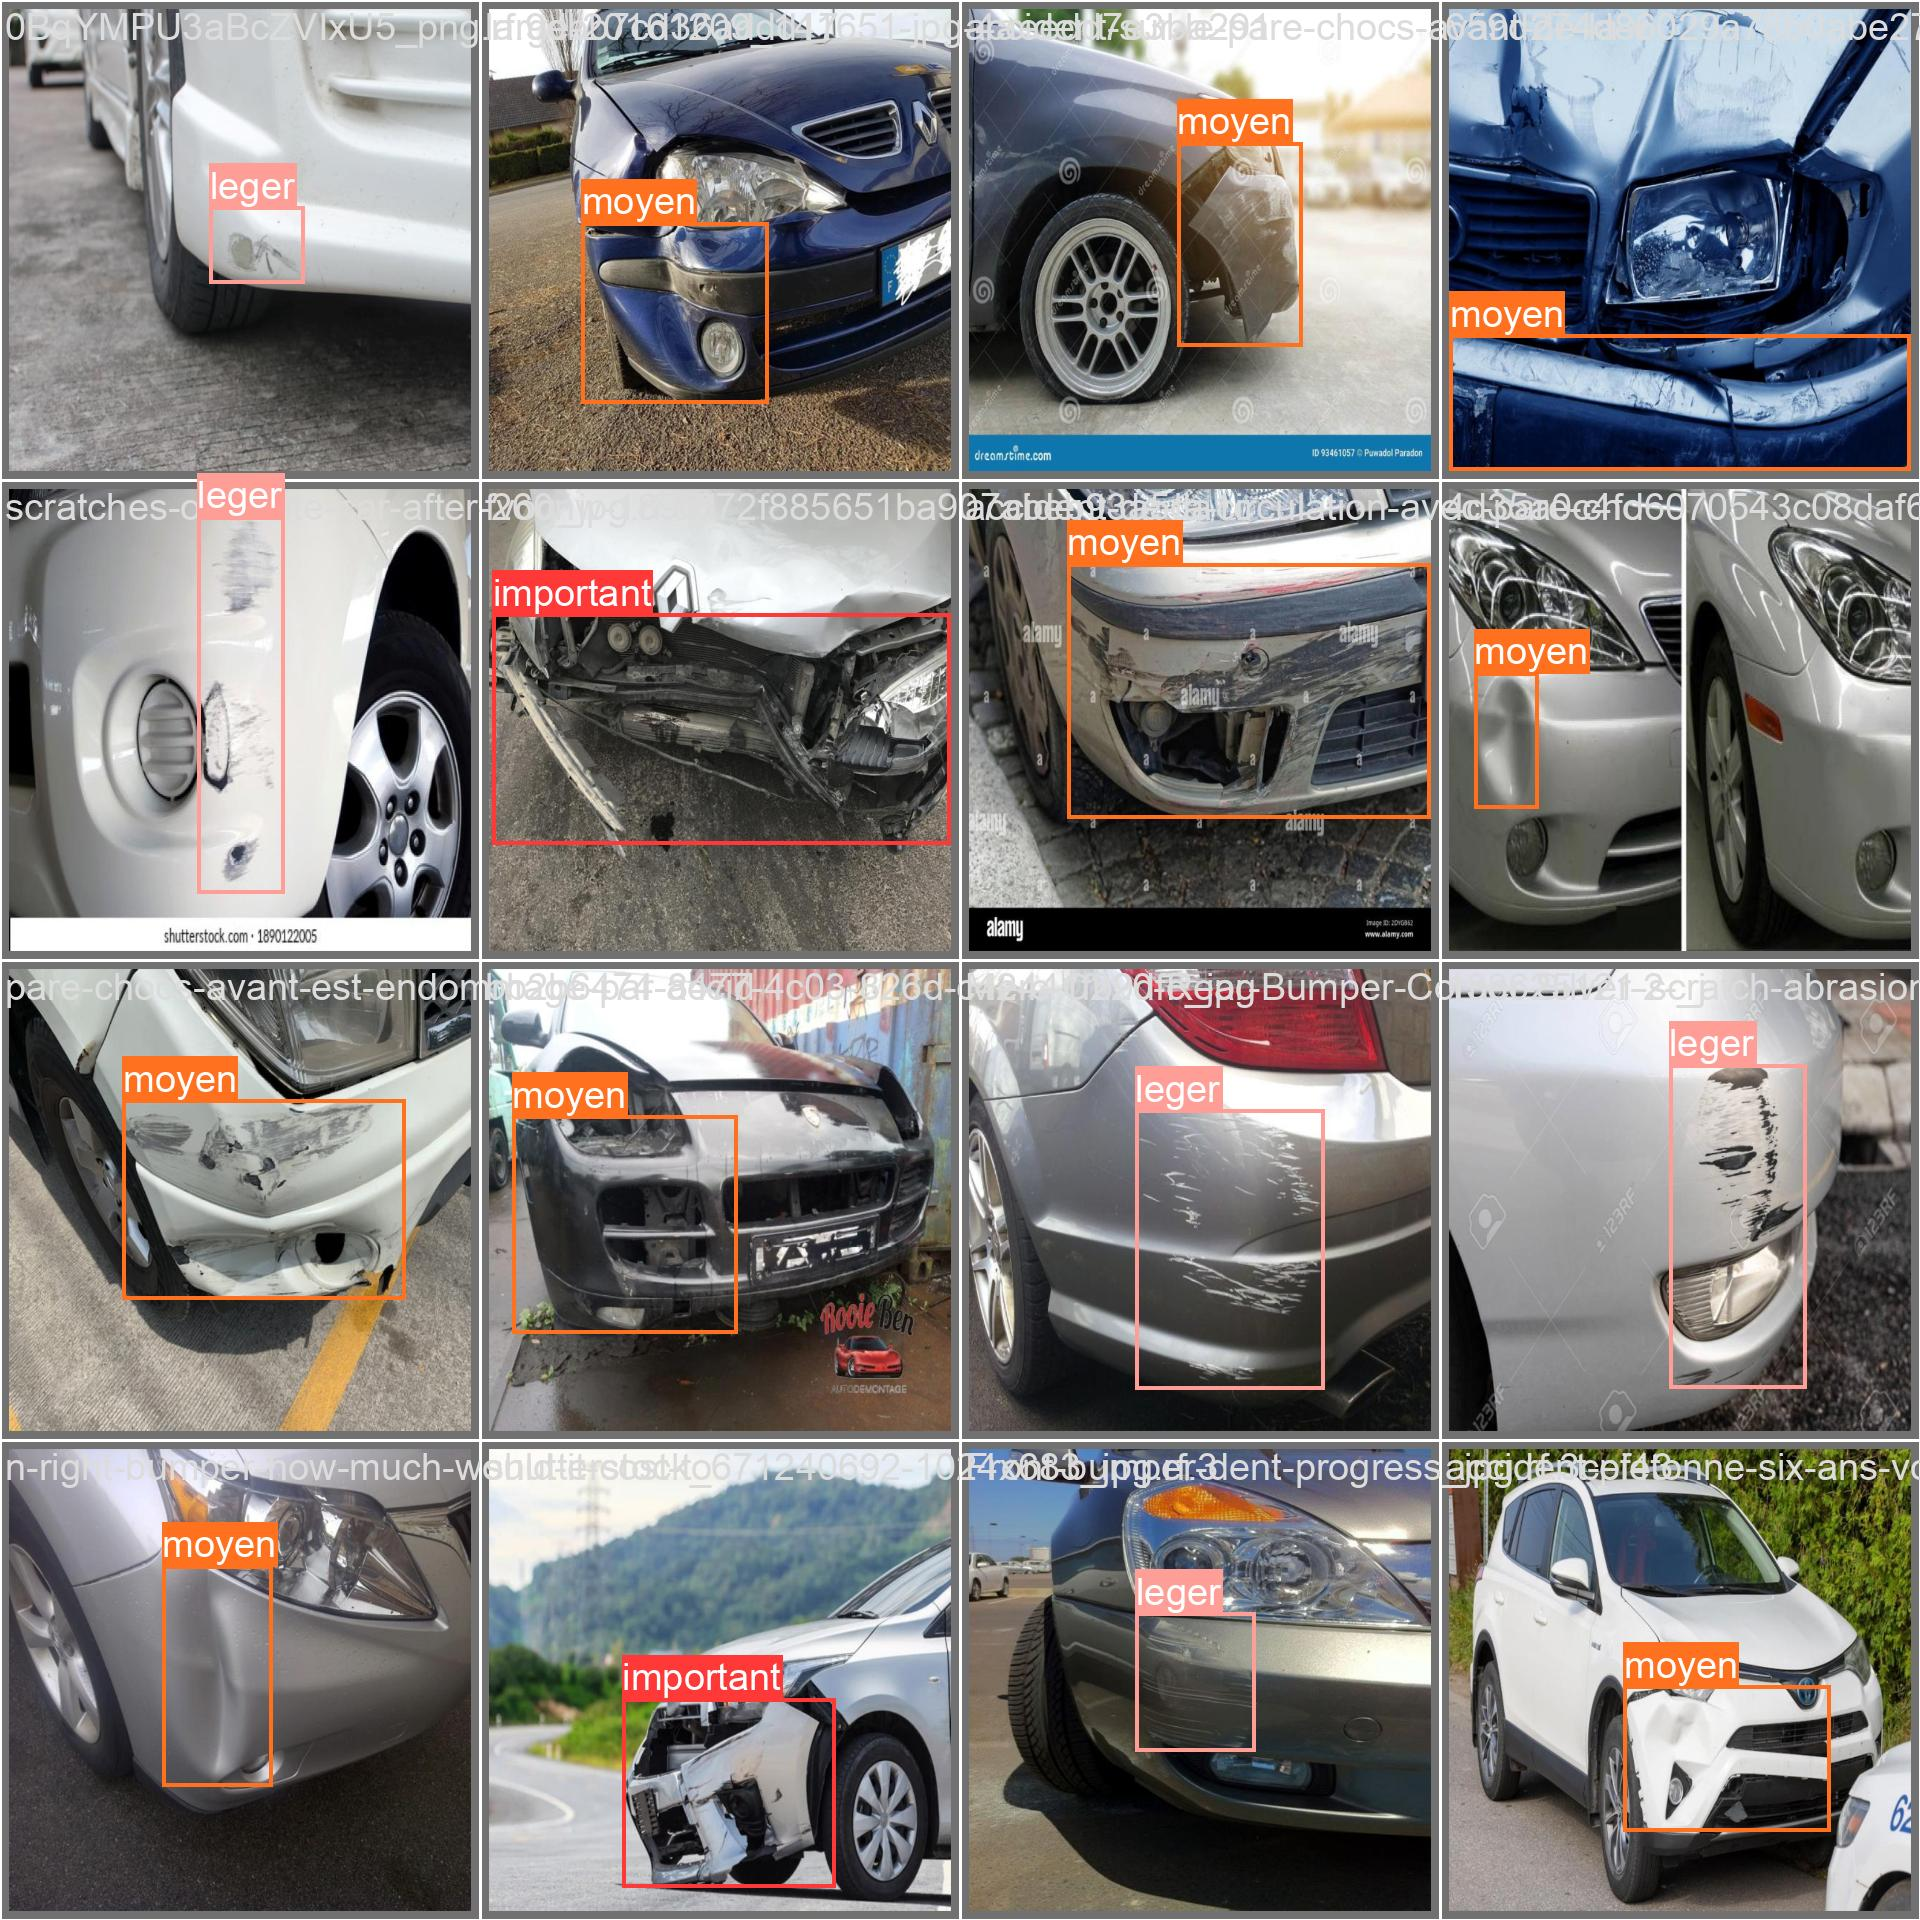

In [14]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=1000)

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/Pare-Chocs-Avant-1/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Pare-Chocs-Avant-1/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100% 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.27it/s]
                   all         17         17      0.879      0.391       0.38      0.142
             important         17          3      0.743      0.972      0.913      0.357
                 leger         17          5      0.894        0.2        0.2     0.0592
                 moyen         17          9          1          0     0.0283    0.00933
Speed: 0.4ms preprocess, 36.7ms inference, 0.0ms loss, 33.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Pare-Chocs-Avant-1/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/8 /content/Pare-Chocs-Avant-1/test/images/25943688-pare-chocs-et-du-capot-de-voiture-accident-avant-cassC3A9_jpg.rf.eb868822cea5aa12f1b8a7ad0abe8754.jpg: 800x800 1 important, 22.6ms
image 2/8 /content/Pare-Chocs-Avant-1/test/images/347002165_jpg.rf.d51d1a62a49a8f19bb83e6ee876eb01f.jpg: 800x800 1 leger, 1 moyen, 22.6ms
image 3/8 /content/Pare-Chocs-Avant-1/test/images/652671c663b641551c7171a2_collision-frontale-vitesse-choc_jpeg.rf.416c0e5a2892a1d98b6a3dc7a7495b13.jpg: 800x800 3 importants, 22.5ms
image 4/8 /content/Pare-Chocs-Avant-1/test/images/IMG_20210205_120302-jpg-162a28b9308dc22a78b7fb759bc2cd25_jpg.rf.a9848cf9e5b84e0f0e97001cfab5189a.jpg: 800x800 2 importants, 22.6ms
image 5/8 /content/Pare-Chocs-Avant-1/test/images/bumper-scratch-repair-scaled_jpg.rf.1097e3fc68805a975849258bfd5086bb.jpg: 800x80

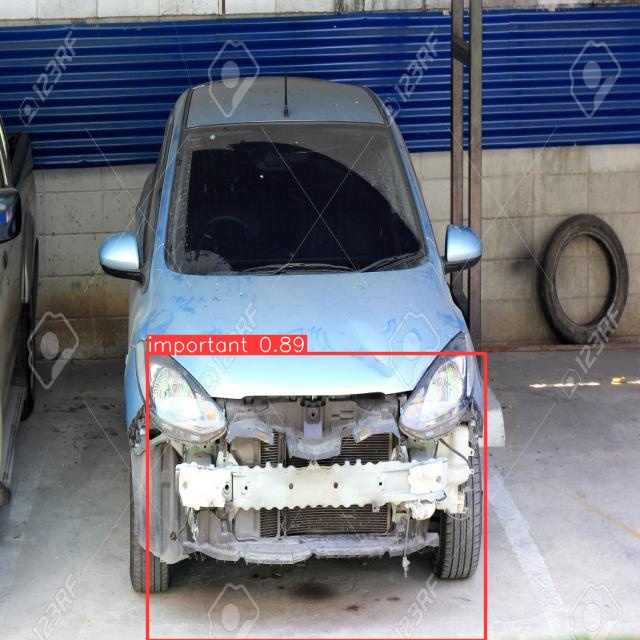

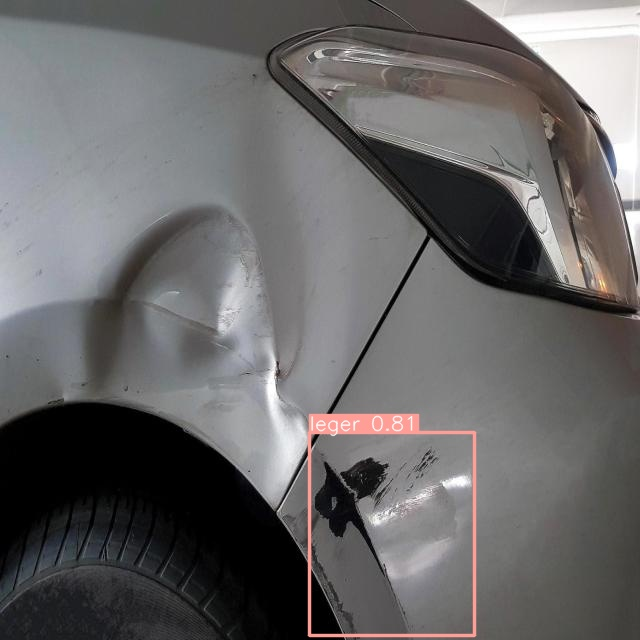

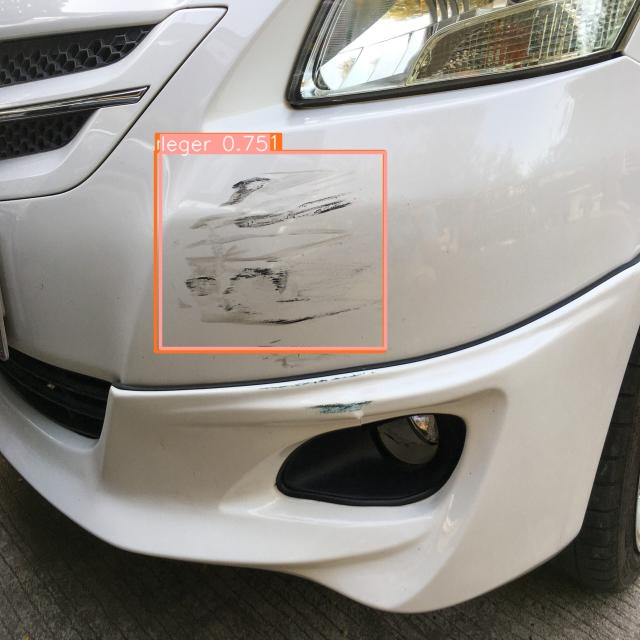

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")